# Análisis de viajes en taxi en Chicago: patrones de demanda e impacto del clima


Se trabajará con un conjunto de datos previamente generados mediante consultas SQL sobre la base de datos proporcionada.
En dichas consultas se realizó:

- Filtrado de datos por rangos de fecha específicos.
- Creación de subconjuntos (slices) según condiciones del análisis.
- Uniones entre tablas mediante JOIN.
- Agrupación de datos con GROUP BY.
- Conteo de viajes por empresa y por barrio.
- Cálculo de promedios de viajes por barrio.
- Clasificación de condiciones climáticas utilizando CASE.
- Extracción de viajes desde Loop hasta O’Hare.
- Filtrado de viajes realizados en sábado.


# Diccionario de Datos:

1) ``project_sql_result_01.csv``: Número de viajes por empresa de taxis (15–16 noviembre 2017)

- ``company_name``: Nombre de la empresa propietaria del taxi.
- ``trips_amount``: Número total de viajes realizados por la empresa durante el 15 y 16 de noviembre de 2017.



2) ``project_sql_result_04.csv``: Promedio de viajes por barrio (noviembre 2017)

- ``dropoff_location_name``: Barrio donde finalizó el viaje.
- ``average_trips``: Promedio de viajes que terminaron en el barrio durante noviembre de 2017.

3) ``project_sql_result_07.csv``: Viajes desde Loop hasta O'Hare con información del clima

- ``start_ts``: Fecha y hora de inicio del viaje.
- ``weather_conditions``: Condiciones climáticas al inicio del viaje: Good (favorables) o Bad (adversas).
- ``duration_seconds``:Duración del viaje en segundos.
    

# Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

# Viajes por empresa (15-16 Noviembre 2017)

In [2]:
# leer archivo
data_one = pd.read_csv('../data/moved_project_sql_result_01.csv')

# top 10 compañías con más viajes
top_data_one = data_one.sort_values(by='trips_amount', ascending=False).head(10)
# re-ordenar para visualización en gráfico
top_data_one = top_data_one.sort_values(by='trips_amount', ascending=True)



# Verificar valores nulos
print('Valores Nulos:')
print(data_one.isna().sum())
print()
print()
#Verificar tipos de datos
print('Tipos de Datos:')
print(data_one.dtypes)
print()
print()
print('Información General de la Tabla:')
data_one.info()
print()
print()
print('10 Compañías de Taxis con más viajes entre el 15 y 16 de Noviembre de 2017:')
print(top_data_one)



Valores Nulos:
company_name    0
trips_amount    0
dtype: int64


Tipos de Datos:
company_name      str
trips_amount    int64
dtype: object


Información General de la Tabla:
<class 'pandas.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   company_name  64 non-null     str  
 1   trips_amount  64 non-null     int64
dtypes: int64(1), str(1)
memory usage: 1.1 KB


10 Compañías de Taxis con más viajes entre el 15 y 16 de Noviembre de 2017:
                        company_name  trips_amount
9  Blue Ribbon Taxi Association Inc.          5953
8          Star North Management LLC          7455
7                           Sun Taxi          7701
6                       City Service          8448
5          Chicago Carriage Cab Corp          9181
4    Taxi Affiliation Service Yellow          9299
3                         Yellow Cab          9888
2                   Medallion Leasin  

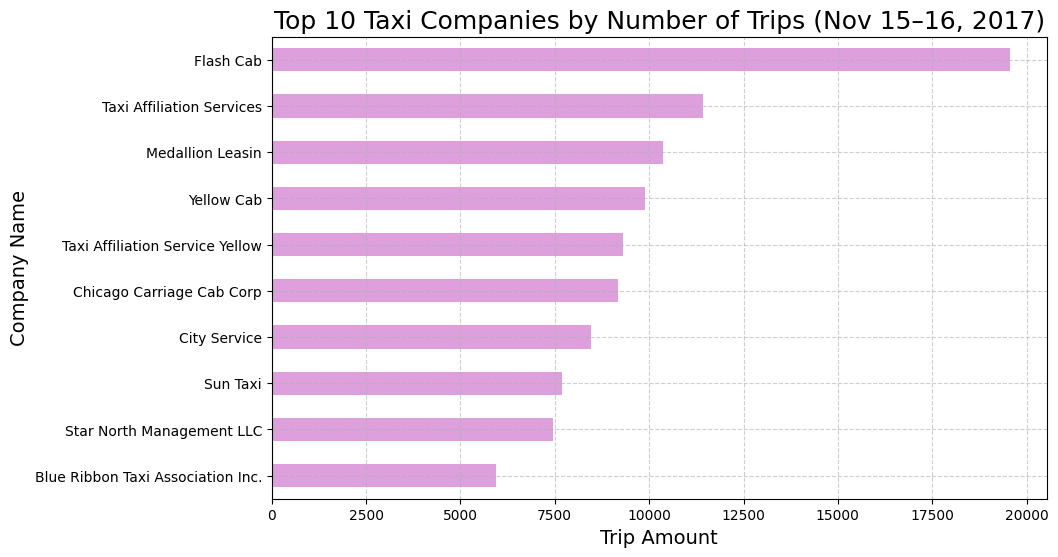

In [3]:
# Realizar gráfica

top_data_one.plot(kind='barh', 
                  x='company_name',
                  y='trips_amount',
                  color='plum', 
                  figsize=(10,6))
plt.xlabel('Trip Amount', fontsize=14)
plt.ylabel('Company Name', fontsize=14)
plt.title('Top 10 Taxi Companies by Number of Trips (Nov 15–16, 2017)', fontsize=18)
plt.legend().remove()
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, rotation=0)
plt.show()

## Conclusión

Durante el 15 y 16 de noviembre del 2017, Flash Cab lidera el número de viajes, con una diferencia considerable respecto a las otras compañías. Le siguen Taxi Affiliation Services y Medallion Leasing, lo que indica una clara concentración del mercado debido a que las tres principales empresas abarcan una proporción significativa del total de viajes, mientras que el resto de las compañías presentan volúmenes notablemente menores. Esto sugiere que pocas empresas dominan el mercado de taxis en Chicago durante estos días.

# Promedio de Viajes por Barrio (Noviembre 2017)

In [4]:
# leer archivo

data_two = pd.read_csv('../data/moved_project_sql_result_04.csv')

# ordenar por average trips
top_data_two = data_two.sort_values(by='average_trips', ascending=False).head(10)
# ordenar por visualización de gráfica
top_data_two = top_data_two.sort_values(by='average_trips', ascending=True)

# Verificar valores nulos
print('Valores Nulos:')
print(data_two.isna().sum())
print()
print()
#Verificar tipos de datos
print('Tipos de Datos:')
print(data_two.dtypes)
print()
print()
print('Información General de la Tabla:')
data_two.info()
print()
print()
print('10 Barrios con la mayor cantidad de viajes promedio en Noviembre de 2017:')
print(top_data_two)

Valores Nulos:
dropoff_location_name    0
average_trips            0
dtype: int64


Tipos de Datos:
dropoff_location_name        str
average_trips            float64
dtype: object


Información General de la Tabla:
<class 'pandas.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     str    
 1   average_trips          94 non-null     float64
dtypes: float64(1), str(1)
memory usage: 1.6 KB


10 Barrios con la mayor cantidad de viajes promedio en Noviembre de 2017:
  dropoff_location_name  average_trips
9    Sheffield & DePaul    1259.766667
8            Gold Coast    1364.233333
7         Museum Campus    1510.000000
6            Grant Park    2068.533333
5             Lake View    2420.966667
4                O'Hare    2546.900000
3             West Loop    5163.666667
2         Streeterville    6664.666667
1          

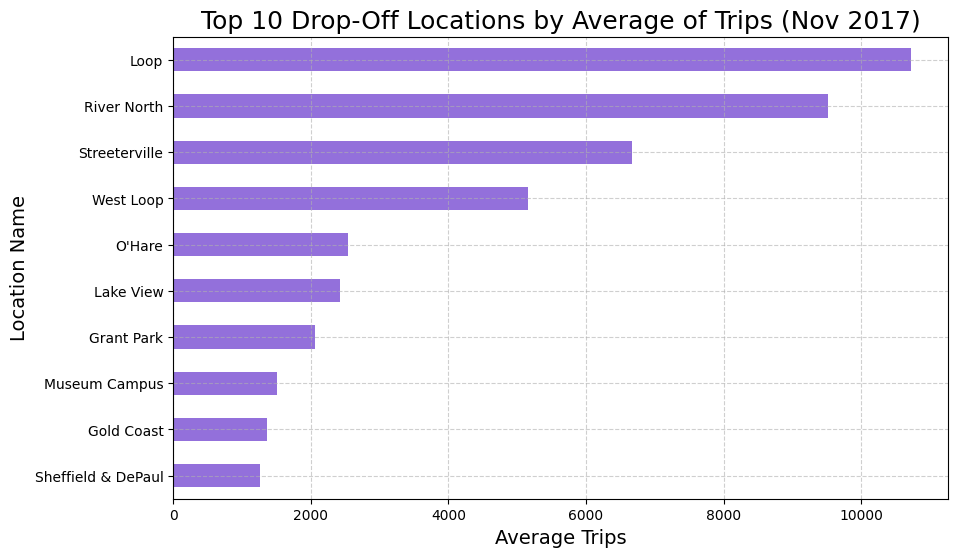

In [5]:
# Realizar gráfica

top_data_two.plot(kind='barh', 
                  x='dropoff_location_name',
                  y='average_trips',
                  color='mediumpurple', 
                  figsize=(10,6))
plt.xlabel('Average Trips', fontsize=14)
plt.ylabel('Location Name', fontsize=14)
plt.title('Top 10 Drop-Off Locations by Average of Trips (Nov 2017)', fontsize=18)
plt.legend().remove()
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10, rotation=0)
plt.show()


## Conclusión:

Durante noviembre de 2017, Loop es el barrio con mayor promedio de viajes finalizados, seguido por River North y Streeterville. Se observa que las zonas céntricas concentran los mayores promedios de finalización, mientras que barrios como Sheffield & DePAul y Gold Coast presentan promedios considerablemente menores. Estas diferencias podrían estar relacionadas con variaciones de actividad entre áreas, como actividad comercial o turística.

# Pruebas estadísticas

¿La duración promedio de los viajes desde el Loop hasta el aeropuerto internacional O’Hare es estadísticamente diferente entre sábados con clima “Good” y sábados con clima “Bad”?

In [6]:
# leer archivo
hyp_data = pd.read_csv('../data/moved_project_sql_result_07.csv')
hyp_data = hyp_data[['weather_conditions','duration_seconds']].dropna()

# Verificar valores nulos
print('Valores Nulos:')
print(hyp_data.isna().sum())
print()
print()
#Verificar tipos de datos
print('Tipos de Datos:')
print(hyp_data.dtypes)
print()
print()
print('Información General de la Tabla:')
hyp_data.info()
print()
print()
print("Duración de viajes desde Loop a O'Hare con información del clima:")
print(hyp_data.head())

# separar los dos grupos Good y Bad
good = hyp_data.loc[hyp_data['weather_conditions'] == 'Good', 'duration_seconds'].to_frame()
bad = hyp_data.loc[hyp_data['weather_conditions'] == 'Bad', 'duration_seconds'].to_frame()

print()
print()
# exploración descriptiva
print('Resumen por grupo (segundos)')
print(hyp_data.groupby('weather_conditions')['duration_seconds'].agg(['count', 'mean', 'median', 'std']))
print()
print()

# Prueba de Levene
levene_stat, levene_p = st.levene(good, bad)
print("levene stat:", levene_stat)
print("Prueba de Levene p-value:", levene_p)
print()
print()

# hipótesis
print("Comprobación de Hipótesis:")
print( "# H₀: La duración promedio es igual en condiciones Bad y Good desde Loop a O'Hare")
print( "# H₁: La duración promedio difiere en condiciones Bad y Good desde Loop a O'Hare")
print()
alpha_values=[.05, .01]

weather_results = st.ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=False)

print('p-value:', weather_results.pvalue)
print()

for alpha in alpha_values:
    if weather_results.pvalue < alpha:
        print(f"Con α={alpha}: Rechazamos H₀")
    else: 
        print(f"Con α={alpha}: No rechazamos H₀")


Valores Nulos:
weather_conditions    0
duration_seconds      0
dtype: int64


Tipos de Datos:
weather_conditions        str
duration_seconds      float64
dtype: object


Información General de la Tabla:
<class 'pandas.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weather_conditions  1068 non-null   str    
 1   duration_seconds    1068 non-null   float64
dtypes: float64(1), str(1)
memory usage: 16.8 KB


Duración de viajes desde Loop a O'Hare con información del clima:
  weather_conditions  duration_seconds
0               Good            2410.0
1               Good            1920.0
2               Good            1543.0
3               Good            2512.0
4               Good            1440.0


Resumen por grupo (segundos)
                    count         mean  median         std
weather_conditions                                        
Bad   

# Conclusión

Los resultados muestran que la duración promedio de los viajes en condiciones climáticas adversas (Bad) es significativamente mayor que en condiciones favorables (Good). Se aplicó una prueba t para muestras independientes con niveles de signifiación α = 0.05 y α = 0.01. El valor p obtenido (p = 6.74e-12) indica que la diferencia observada es altamente improbable bajo la hipótesis nula. Por lo tanto, se rechaza la hipótesis nula y se concluye que la duración promedio de los viajes difiere entre condiciones Good y Bad los sábados.